In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('titanic.csv')


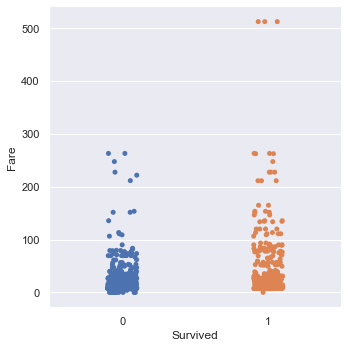

In [41]:
sns.catplot(x="Survived", y="Fare", data=df);
# This graph shows that if the Fare increase, there are more people survived(orange dots) than people not 
# survived(blue dots). Especially in Fare range 100 - 300

In [54]:
sort_by_fare = df.sort_values('Fare')
print(sort_by_fare)
# sort the whole data set by Fare

     Survived  Pclass                               Name     Sex   Age  \
275         0       2                 Mr. Francis Parkes    male  21.0   
478         0       2             Mr. Anthony Wood Frost    male  37.0   
411         0       2      Mr. Alfred Fleming Cunningham    male  22.0   
594         0       3                 Mr. Alfred Johnson    male  49.0   
630         0       1       Mr. William Henry Marsh Parr    male  30.0   
..        ...     ...                                ...     ...   ...   
27          0       1      Mr. Charles Alexander Fortune    male  19.0   
339         1       1      Miss. Alice Elizabeth Fortune  female  24.0   
733         1       1              Mr. Gustave J Lesurer    male  35.0   
257         1       1                    Miss. Anna Ward  female  35.0   
676         1       1  Mr. Thomas Drake Martinez Cardeza    male  36.0   

     Siblings/Spouses Aboard  Parents/Children Aboard      Fare  
275                        0                 

In [109]:
# form people into groups, each group contain certain amount of people
# count number of survied people in that group
num_in_group = 0
survived = 0
not_survived = 0
start_range = 0
end_range = 0
result = {}

for index, row in sort_by_fare.iterrows():
    start_range = min(start_range, row['Fare'])
    end_range = max(end_range, row['Fare'])
    
    if row['Survived'] == 1:
        survived += 1
    else: 
        not_survived += 1
    num_in_group += 1
    
    
    if num_in_group == 100:
#         there are enought people in the each group
#         add entry with price range and number of people survived
        group_range = '{} - {}'.format(start_range, end_range)
        result[group_range] = survived
    
        start_range = end_range
        end_range = 0
        num_in_group = 0
        survived = 0
        not_survived = 0
        
# dealing with what leftover     
group_range = '{} - {}'.format(start_range, end_range)
result[group_range] = survived

resultset = pd.DataFrame(list(result.items()), columns = ['Fare range', 'Survival'])
resultset


,Fare range,Survival
0,0 - 7.7333,15
1,7.7333 - 7.8958,29
2,7.8958 - 8.6625,16
3,8.6625 - 13.0,35
4,13.0 - 18.75,40
5,18.75 - 26.2875,48
6,26.2875 - 39.0,42
7,39.0 - 77.9583,51
8,77.9583 - 512.3292,66


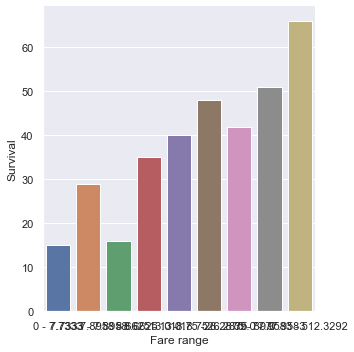

In [110]:
sns.catplot(x="Fare range", y="Survival", kind="bar", data=resultset);